In [1]:
import warnings
warnings.filterwarnings('ignore')

## Enforce CPU

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

## Load MINST

In [3]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path='mnist.npz')

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## Peek the Image

Train:


6


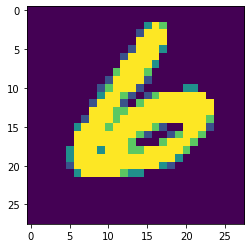

7


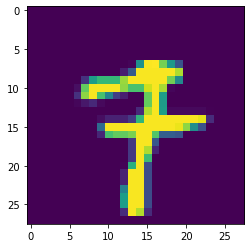

5


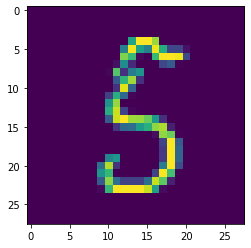

8


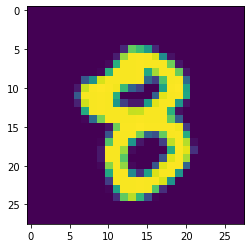

8


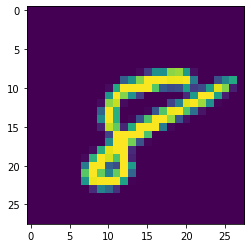

Test:


4


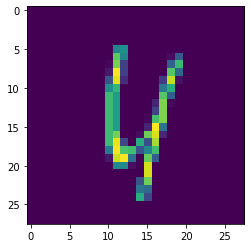

2


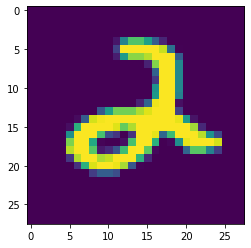

7


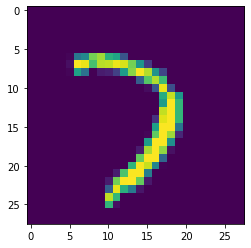

4


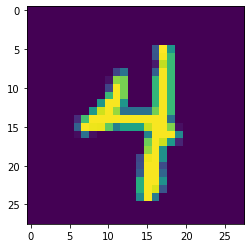

6


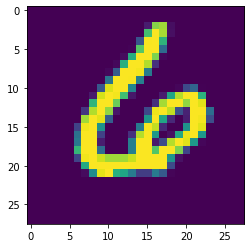

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def show_img(cat='train'):
    if cat == 'train':
        print('Train:\n\n')
        random_img_idx = np.random.choice(len(training_labels), 5)

        for ix in random_img_idx:
            print(training_labels[ix])
            plt.imshow(training_images[ix, :, :, 0])
            plt.show()
            
    if cat == 'test':
        print('Test:\n\n')
        random_img_idx = np.random.choice(len(test_labels), 5)

        for ix in random_img_idx:
            print(test_labels[ix])
            plt.imshow(test_images[ix, :, :, 0])
            plt.show()
        

# Train
show_img(cat='train')
    
# Test
show_img(cat='test')

## Define DNN

In [24]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
import time

class timecallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_begin = time.time()
        self.time_per_epoch  = []
        
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_train_begin = time.time()
    
    def on_epoch_end(self, epoch, logs={}):
        self.time_per_epoch.append(time.time()-self.epoch_train_begin)

myCallback = timecallback()

In [25]:
history = model.fit(training_images, training_labels, epochs=10, callbacks=[myCallback])
print('\nhistory dict:', history.history)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 975us/sample - loss: 0.1133 - accuracy: 0.9651
Epoch 2/10
60000/60000 [==============================] - 60s 997us/sample - loss: 0.0378 - accuracy: 0.9883
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0216 - accuracy: 0.9930
Epoch 4/10
60000/60000 [==============================] - 59s 990us/sample - loss: 0.0141 - accuracy: 0.9952
Epoch 5/10
60000/60000 [==============================] - 59s 989us/sample - loss: 0.0093 - accuracy: 0.9969
Epoch 6/10
60000/60000 [==============================] - 60s 995us/sample - loss: 0.0082 - accuracy: 0.9974
Epoch 7/10
60000/60000 [==============================] - 59s 991us/sample - loss: 0.0062 - accuracy: 0.9980
Epoch 8/10
60000/60000 [==============================] - 59s 988us/sample - loss: 0.0050 - accuracy: 0.9986
Epoch 9/10
60000/60000 [==============================] - 59s 987us/sample - loss: 0.0048 - accuracy: 0.998

In [27]:
import pickle

pickle.dump(myCallback.time_per_epoch, open('mnist_time_cpu.pkl', 'wb'))